# Regression Analysis for Predicting the Compressive Strength of Concrete

In [ ]:
We will use the regression algorithm in this notebook to forecast the compressive strength of the concrete mixture based on its features, which include the percentage of each component mixed in.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [3]:
concrete=pd.read_csv('/kaggle/input/cement-manufacturing-concrete-dataset/concrete.csv')
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# We'll examine the dataframe's number of entries as well as their data types.
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

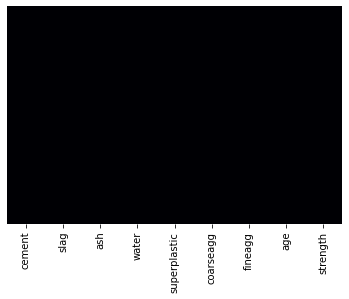

In [8]:
# Using concrete data in boolean format, we will create a heatmap to detect the presence of null values.isnull()
sns.heatmap(concrete.isnull(),yticklabels=False,cbar=False,cmap='magma')
concrete.isnull().sum()

> - Since ther is no color variation on the heatmap it is clear that there is no null values on the dataset

In [9]:
concrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [10]:
concrete.duplicated().sum()

25

In [15]:
# we'll determine whether the boolean output represents a repetition of the entire row.
duplicates=concrete.duplicated()
duplicates.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [16]:
concrete.drop_duplicates(inplace=True)

In [17]:
concrete.duplicated().sum()

0

Text(0.5, 1.0, 'correlaton amoung features on concrete mixture')

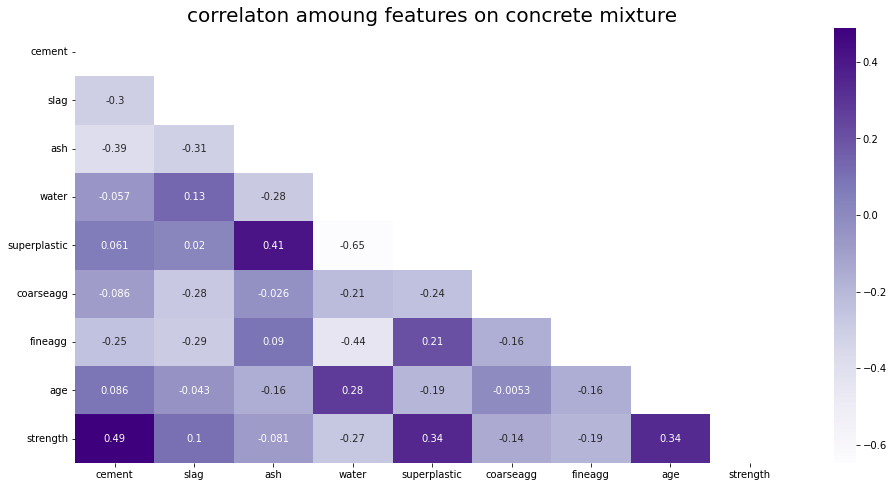

In [18]:
# Heatmap to draw correlation 
plt.figure(figsize=(16,8))
mask=np.triu(np.ones_like(concrete.corr()))
sns.heatmap(concrete.corr(),annot=True,cmap='Purples',mask=mask)
plt.title('correlaton amoung features on concrete mixture',fontsize=20)

# Inference from Heatmap
1. As we can see most of the input features exhibit negative correlation with one other, only few of them are positively correlated with one another.
2. This indicates if we increase the input features by one unit, the correlated feature corresponding to the input feature will also increase by one unit and it will exhibit decrease fashion on one feature if we decrease other by one unit for positively correlated features.
3. For negatively correlated features it will exhibit inverse relation, if we increase one feature by one unit the other will decrease by one unit and vice versa
4. since there is no strong correlation between features we can not implement interaction term to increase accuracy of base model.

<AxesSubplot:>

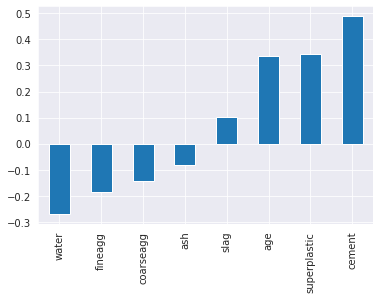

In [19]:
# Bar plot correlation
sns.set_style('darkgrid')
concrete.corr()['strength'].sort_values()[:-1].plot(kind='bar')

# Inference from barplot correlation
1. As we can see we can increase the compressive strength by increasing the input features like slag,superelastic,cement,age but we can not increase it indefnitelly beacause the concrete needs other ingredients as well.
2. We can also increase the compressive strength by decreasing the input features like water,fine aggregate,coarse aggregate,ash but we can not decrease it indefnitelly beacause the concrete needs sufficient amount of them as well.

# Model 1: Linear Regression

# 4. Train Test Split
> - In this section we will split data as 2-way split not a 3-way split in form of train data and test data.
> - The train and test data is split in **( 70 % and 30 % )** proportion.

In [23]:
X=concrete.drop('strength',axis=1)
y=concrete['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([ 0.11765422,  0.10065515,  0.08391336, -0.1234702 ,  0.3242327 ,
        0.01906531,  0.02415325,  0.10228679])

In [29]:
# Dataframe with coefficent
df=pd.DataFrame(data=lr.coef_,index=X.columns,columns=['coef'])
df

,coef
cement,0.117654
slag,0.100655
ash,0.083913
water,-0.123470
superplastic,0.324233
coarseagg,0.019065
fineagg,0.024153
age,0.102287


Text(0, 0.5, 'y_test')

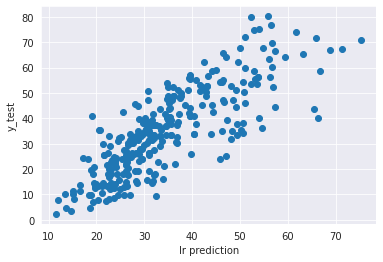

In [32]:
prediction=lr.predict(X_test)

plt.scatter(x=prediction,y=y_test)
plt.xlabel('lr prediction')
plt.ylabel('y_test')

> - There exists **no strong linear reationship** between predicted value and true value which shows that the **accuracy** of the model is **poor**

In [34]:
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared',r2_score(y_test,prediction))

RMSE 9.82810187059905
R squared 0.6533485292319297


In [ ]:
# we will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will create plot using labelled data
plt.plot(np.arange(len(X_test)),y_test.values,label='true_curve')

# We will create plot using predicted data
plt.plot(np.arange(len(X_test)),prediction,label='predicted_curve')

# We will set the title
plt.title('Linear Regression',fontsize=20)
plt.legend()

> - As we can see there is **high variance** between the predicted value and true value

In [ ]:
# We will import statsmodel library
import statsmodels.api as sm

In [ ]:
# We will define the fuction as linear_regression
def linear_Regression(x,y):
    x=sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print(model.summary())

In [ ]:
# We will call the function to get result
linear_Regression(X,y)

# Inference from model
1. The **R-squared** value is 60.4 % which states around 60.4 % of prportion of variability in data can be explained by linear regression model,it is the most important parameter for model evaluation higher the value better is the fit
2. The **p-value** is an important measure for evaluating variables.closer is the **p-value to 1**,lesser the variable has to do with the **label variable** , in our model all parameter have more or less equal performance.
3. Final expression
> - compressive strength= -17.918 +(0.01172 x cement)+(0.0995 x slag)+(0.0856 x ash)-(0.1522 x water)+(0.2849 x superplastic)+(0.0157 x coarseagg)+(0.0183 x fineagg)+(0.1122 x age)
4. In **absence** of all parameter the compressive strength will **decrease by 17.91** , the **negative coefficent** of water states that if we **increase water presence** the **compressive strength decrese** , the **positive coefficient*** states that if we **increase cement by 1 unit the compressive strength will increase by 0.01172 units.**

# Model 2: Random Forest Regression

> - In this section we will carry out different regression model for better prediction on same data train and test data is split to **( 70 % and 30 % )** proportion.

# 5.1. Model building without grid search (random parameters)
> - We will import RandomForestRegressor from sklearn.ensemble
> - We will set random parameters for random forest regression.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# We will create an object for random regression as rf with 60 sub trees
rf=RandomForestRegressor(n_estimators=60,random_state=42)

In [ ]:
# We will fit the training data to train the model(labelled data) by using .fit() call 
rf.fit(X_train,y_train)

In [ ]:
# We will predict the output for test data by calling .predict() call
rf_prediction=rf.predict(X_test)

In [ ]:
# We will see the relationship between the predicted value and true test value in graphical representation
plt.scatter(rf_prediction,y_test)

# We will set x label on plot(plt)
plt.xlabel('rf prediction')

# We will set y label on plot(plt)
plt.ylabel('y_test')

> - There exist a **strong linear relationship** between the true value and predicted value shows that **accuracy** of the model is **good**

# 6.1. Model evaluation

In [ ]:
print('RMSE',np.sqrt(mean_squared_error(y_test,rf_prediction)))
print('R squared',r2_score(y_test,rf_prediction))

In [ ]:
# We will create a space and set the graph size 
plt.figure(figsize=(16,8))

# We will create plot using labelled data
plt.plot(np.arange(len(X_test)),y_test.values,label='true_curve')

# We will create plot using predicted data
plt.plot(np.arange(len(X_test)),rf_prediction,label='predicted_curve')

# We will set the title
plt.title('Random Forest Regression',fontsize=20)
plt.legend()

> - The true curve and predicted curve overlap with one another shows the **variance of random regression is lower** than linear regression.

In [ ]:
# We will call the .feature_importances_ on the object rf
rf.feature_importances_

In [ ]:
# We will create dataframe as f_importance with rf_importance as data for better undestanding
f_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['value'])

# We will see the dataframe by calling its name
f_importance

> - As we can see the input feature age and cement are more important than other on predicting compressive strength.

# 5.1.1. Model building with grid searched parameters
> - We will do grid search to find best parameters for random forest regression 

In [ ]:
# number of trees in random forest
n_estimators=np.arange(50,500,25)
# no of features to consider at every split
max_features=['sqrt','log2']
# minimum no of samples required to split a node
min_samples_split=[2,4]
# mimimum no of samples required at each leaf node
min_samples_leaf=[1,2]
# methode of selecting samples for training eeach tree
bootstrap=[True,False]

In [ ]:
# We will crate parameter grid
param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "bootstrap":bootstrap}

In [ ]:
rf=RandomForestRegressor()

In [ ]:
# W e will import Gridsearchcv from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# We will create object called rf_grid
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
# W e will fit train data 
rf_grid.fit(X_train,y_train)

In [ ]:
# We will get the best parameters by calling .best_params_ on object(rf_grid)
rf_grid.best_params_

In [ ]:
# We will predict create rf with best parameters
rf=RandomForestRegressor(bootstrap= False,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split=4,
 n_estimators=200)

In [ ]:
# We will fit train data by applying best parameters
rf.fit(X_train,y_train)

In [ ]:
# We will predict x_test data by .predict call
pred=rf.predict(X_test)

# 6.1.1. Model evaluation

In [ ]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R squared',r2_score(y_test,pred))

In [ ]:
print('R squared value on train data =',rf_grid.score(X_train,y_train))
print('R squared value on test data =',rf_grid.score(X_test,y_test))

# Inference from model
1. Model accuracy comparrison
> - For **model** that builded **with out grid searched parameter i.e. random parameter** the **R-squared** value is **91.5 %** which states around **91.5 %** of prportion of variability in data can be explained by Random Forest regression model,it is the most important parameter for model evaluation higher the value better is the fit.
> - For **model** that builded **with out grid searched parameter i.e. random parameter** the **R-squared** value is **92.0 %** which states around **92.0 %** of prportion of variability in data can be explained by Random Forest regression model,it is the most important parameter for model evaluation higher the value better is the fit.
> - **Result:**
      The **model accuracy** can be **fine tuned** futher to get **better accuracy by extending the parameter range** on random forest regression
2. Since Random forest regression uses **bagging technique** to split data amoung various decision tree,we are able to achive better accuracy.
3. **bagging technique** is the reason why we may be reduce that much variance that happens during prediction.

# Summary
1. We have studied two modes of regression in this notebook to study the relationship between the **compressive strength** of concrete mixture and **other 8 features**
2. First we have gone through **linear regression which does not fit well** and **correlation between features is not that much strong we can not implement interaction term** to **increase accuracy of our model.**
3. So we have gone for **random forest regrssion** which have **no need interaction term to increase accuracy of our model.**